In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./MC1/mc1-reports-data.csv",parse_dates=True,infer_datetime_format=True, index_col=0)
data = data.sort_index()
data.head()

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
time,,,,,,,
2020-04-06,2.0,4.0,1.0,NaN,4.0,NaN,17
2020-04-06,2.0,8.0,5.0,NaN,3.0,0.0,2
2020-04-06,9.0,7.0,5.0,NaN,4.0,NaN,8
2020-04-06,10.0,2.0,9.0,NaN,10.0,NaN,4
2020-04-06,6.0,2.0,9.0,NaN,4.0,1.0,15


- time: timestamp of incoming report/record, in the format YYYY-MM-DD hh:mm:ss

In [3]:
pd.unique(data.index)

array(['2020-04-06T00:00:00.000000000', '2020-04-06T00:05:00.000000000',
       '2020-04-06T00:10:00.000000000', ...,
       '2020-04-10T23:50:00.000000000', '2020-04-10T23:55:00.000000000',
       '2020-04-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
dd = [sum(data.index.day==6),sum(data.index.day==7),sum(data.index.day==8),sum(data.index.day==9),
sum(data.index.day==10),sum(data.index.day==11)]
print(dd)

[4963, 2252, 43670, 24935, 7244, 6]


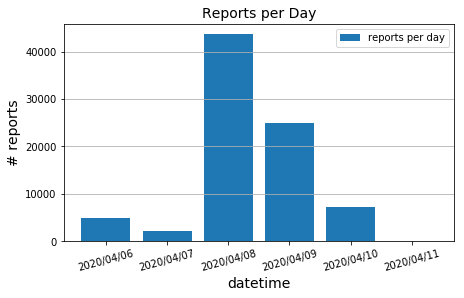

In [5]:
plt.figure(figsize=(7,4))
plt.xticks(range(len(dd)),["2020/04/06","2020/04/07","2020/04/08","2020/04/09","2020/04/10","2020/04/11"],
          rotation=15)
plt.title("Reports per Day", size=14)
plt.ylabel("# reports", size=14)
plt.xlabel("datetime", size=14)
plt.grid(axis='y');
plt.bar(range(len(dd)),dd, label="reports per day");
plt.legend();

#### Descripción
- se puede concluir que el día 8 se sintió mucho más el daño, o puede ser que ese día volvió la energía y las personas se pudieron comunicar.

In [6]:
data.loc[data.index.day==8].index[0]

Timestamp('2020-04-08 00:00:00')

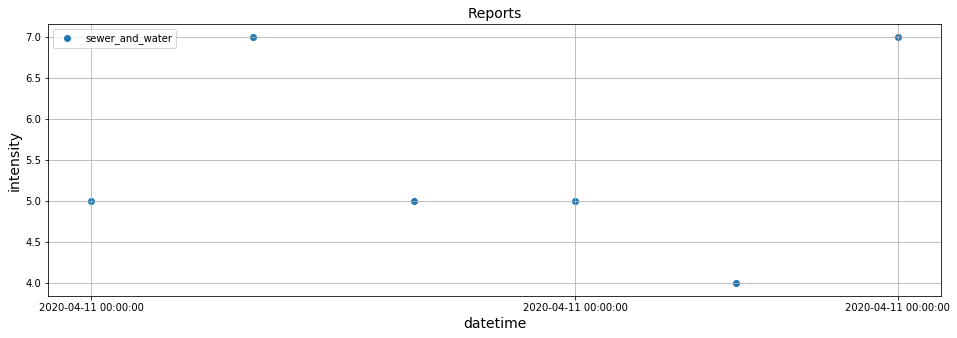

In [7]:
plt.figure(figsize=(16,5))
plt.title("Reports", size=14)
plt.ylabel("intensity", size=14)
plt.xlabel("datetime", size=14)
day = 11
minimo = 0
medio = int(data.loc[data.index.day==day].shape[0]/2)
maximo = data.loc[data.index.day==day].shape[0] - 1
y = data.loc[data.index.day==day]["sewer_and_water"]

plt.xticks([minimo,medio,maximo], [y.index[minimo], y.index[medio], y.index[maximo]])
plt.grid(axis='both');
plt.scatter(range(data.loc[data.index.day==day].shape[0]), y ,
         label="sewer_and_water");
plt.legend();

In [8]:
data.loc[data.index.day==6]

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
time,,,,,,,
2020-04-06 00:00:00,2.0,4.0,1.0,NaN,4.0,NaN,17
2020-04-06 00:00:00,2.0,8.0,5.0,NaN,3.0,0.0,2
2020-04-06 00:00:00,9.0,7.0,5.0,NaN,4.0,NaN,8
2020-04-06 00:00:00,10.0,2.0,9.0,NaN,10.0,NaN,4
2020-04-06 00:00:00,6.0,2.0,9.0,NaN,4.0,1.0,15
2020-04-06 00:00:00,9.0,7.0,4.0,NaN,8.0,0.0,18
2020-04-06 00:00:00,8.0,1.0,10.0,NaN,3.0,1.0,4
2020-04-06 00:00:00,6.0,3.0,10.0,10.0,9.0,NaN,3
2020-04-06 00:05:00,10.0,3.0,8.0,4.0,1.0,NaN,6


In [9]:
data.loc[data["location"]==8].loc[data.loc[data["location"]==8].index.day==6].shape[0]

654

In [18]:
day = 6
x6 = np.array([65,80,100,118,80,78,148,133,110,125,135,135,120,99,88,88,110,110,98])
y6 = np.array([135,145,153,130,100,122,98,53,60,68,70,95,98,125,125,110,85,105,105])
r6 =[]
r7 = []
for i in np.arange(1,20):
    r6.append(data.loc[data["location"]==i].loc[data.loc[data["location"]==i].index.day==day].shape[0])
    r7.append(data.loc[data["location"]==i].loc[data.loc[data["location"]==i].index.day== 7 ].shape[0])
print(x6.shape, y6.shape)

df6 = pd.DataFrame()
df6["neighborhood"] = np.arange(1,20)
names = ["Palace Hills", "Northwest","Old Town", "Safe Town","Southwest","Downtown",
        "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "TerrapinSprings",
        "Pepper Mill", "CheddardFord", "Easton", "Weston", "Southon", "Oak Willow",
        "East Parton", "West Parton"]
df6["name"] = names
df6["quantidade6"] = r6
df6["x6"] = x6
df6["y6"] = y6
df6["r6"] = (np.array(r6)/max(r6))*3
df6["x7"] = x6+110
df6["y7"] = y6
df6["r7"] = (np.array(r7)/max(r7))*3
df6["quantidade7"] = r7
df6.head()

(19,) (19,)


,neighborhood,name,quantidade6,x6,y6,r6,x7,y7,r7,quantidade7
0,1,Palace Hills,105,65,135,0.481651,175,135,0.909449,77
1,2,Northwest,390,80,145,1.788991,190,145,2.704724,229
2,3,Old Town,596,100,153,2.733945,210,153,2.161417,183
3,4,Safe Town,114,118,130,0.522936,228,130,0.602362,51
4,5,Southwest,193,80,100,0.885321,190,100,1.133858,96


In [19]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output
from bokeh.models import LabelSet, Label, ColumnDataSource
reset_output() #Para que no abra un nuevo navegador
output_notebook()
#output_file('image.html')
TITLE = "Chamadas por area em os días do terremoto"
TOOLS = "hover,box_select,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above",width=900, height=500,
           x_range=(0,200), y_range=(0,200), title=TITLE)
p.image_url(url=['MC1/mapa.svg'], x=50,y=180,w=100,h=150)
p.circle(x="x6",y="y6", source = ColumnDataSource(df6), fill_color="red", line_color="black",
         alpha=0.8, radius="r6", legend="# de chamadas")
p.hover.tooltips = [
    ("name", "@name"),
    ("neighborhood", "@neighborhood"),
    ("quantidade:", "@quantidade6")
]
citation = Label(x=100, y=185,text='Dia 6', text_font_size="24px")
p.add_layout(citation)
#MAPA DEL DÍA 7
p.image_url(url=['MC1/mapa.svg'], x=160,y=180,w=100,h=150)
p.circle(x="x7",y="y7", source = ColumnDataSource(df6), fill_color="red", line_color="black",
         alpha=.8, radius="r7")
p.hover.tooltips = [
    ("name", "@name"),
    ("neighborhood", "@neighborhood"),
    ("quantidade:", "@quantidade7")
]
citation = Label(x=205, y=185,text='Dia 7', text_font_size="24px")
p.add_layout(citation)
show(p)
#anotación de valores
#labels = LabelSet(x="x6", y="y6", text="quantidade",
#                  text_font_size="8pt", text_color="grey",
#                  source=ColumnDataSource(df6), text_align='center')


Loading BokehJS ...